# Validation of connectivity

This notebook forms the basis of the connectivity validation.

## Start ipcluster to run in parallel
To run in parallel you need to first start ipcluster. On linux you type the following into the terminal, note that you should be in the same directory as this notebook is in.

```
if [[ -d "$HOME/BasalGangliaData/data" ]]; then
    export SNUDDA_DATA="$HOME/BasalGangliaData/data"
    echo "Setting SNUDDA_DATA to $SNUDDA_DATA"
else
    echo "SNUDDA_DATA environment variable not changed (may be empty): $SNUDDA_DATA"
fi

export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start
```

These commands are in ```start_ipcluster.sh``` in the examples/notebook directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook. The first if statement checks if you have ```BasalGangliaData```, if it does exist then ```SNUDDA_DATA``` is set.

If you restart the run you might need to do:

```
ipcluster stop
ipcluster start
```

For instructions how to install and activate ipyparallel for your notebook see https://github.com/ipython/ipyparallel

In [1]:
import os
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [2]:
# If the BasalGangliaData directory exists, then use that for our data
BG_path = os.path.join("..", "..","..","..","..", "BasalGangliaData", "data")
if os.path.exists(BG_path):
    os.environ["SNUDDA_DATA"] = BG_path
    print(f"Setting SNUDDA_DATA to {BG_path}")
else:
    print(f"SNUDDA_DATA environment variable not changed (may be empty)")

Setting SNUDDA_DATA to ../../../../../BasalGangliaData/data


In [3]:
import os

network_path = os.path.join("networks/connectivity_validation")

from snudda import SnuddaInit
struct_def = {"Striatum": 2000 }

si = SnuddaInit(network_path=network_path, struct_def=struct_def, random_seed=1234)

Adding Striatum with 2000 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.00

In [4]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, rc=rc)
sp.place()

In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 135/448 (1926 neurons)
Processing hyper voxel : 128/448 (1777 neurons)
Processing hyper voxel : 191/448 (1719 neurons)
Processing hyper voxel : 134/448 (1698 neurons)
Processing hyper voxel : 184/448 (1542 neurons)
Processing hyper voxel : 127/448 (1520 neurons)
Processing hyper voxel : 190/448 (1457 neurons)
Processing hyper voxel : 183/448 (1268 neurons)
Processing hyper voxel : 136/448 (587 neurons)
Processing hyper voxel : 79/448 (559 neurons)
Processing hyper voxel : 142/448 (495 neurons)
Processing hyper voxel : 72/448 (467 neurons)
Processing hyper voxel : 129/448 (460 neurons)
Processing hyper voxel : 192/448 (438 neurons)
Processing hyper voxel : 198/448 (419 neurons)
Processing hyper voxel : 78/448 (414 neurons)
Processing hyper voxel : 141/448 (386 neurons)
Processing hyper voxel : 185/448 (327 neurons)
Processing hyper voxel : 71/448 (308 neurons)
Processing hyper voxel : 197/448 (307 neurons

In [6]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

Worker synapses: 11/16900225 (heap size: 37)
Worker synapses: 4027051/16900225 (heap size: 36)
Worker synapses: 8307529/16900225 (heap size: 32)
Worker synapses: 12692396/16900225 (heap size: 26)
Worker synapses: 16900225/16900225 (heap size: 0)
Read 16900225 out of total 16900225 synapses
Read 262 out of total 262 gapJunctions


## Validating the connection probability

Next we read in the ```network-synapses.hdf5``` file and validates that the connection probabilities are correct.

In [7]:
import os
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join(network_path,"network-synapses.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Loading 1999 neurons with 900436 synapses and 127 gap junctions
Number of neurons: 1999
Synapse row 0 - 0.0 % time: 0.049753813999814156 seconds
Created connection matrix 0.9861815700000989 seconds
GJ row : 0 - 0.0 %  time : 0.0013533420001294871 seconds
Created gap junction connection matrix 0.0016774690002421266 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 1999/1999
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 900436, at 0
Created distance histogram (optimised) in 1.0396718279998822 seconds
Saving cache to networks/connectivity_validation/network-synapses.hdf5-cache


Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [392414.]
Rejected (too large z-depth): 543642
P(d<5e-05) = 0.26602459208004114
P(d<0.0001) = 0.21184733257661748


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1367: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


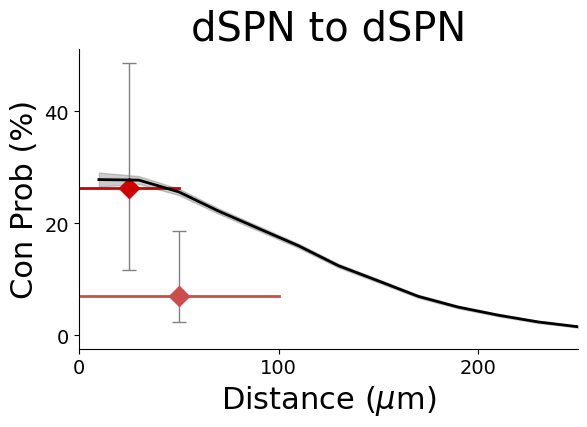

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf


In [8]:
# Planert et al 2010, Taverna et al 2008
sa.plot_connection_probability("dSPN", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[5 / 19.0, 3 / 43.0],
                               exp_data_detailed=[(5, 19), (3, 43)],
                               y_max=y_max_H)

Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [394390.]
Rejected (too large z-depth): 542634
P(d<5e-05) = 0.059585255561138264
P(d<0.0001) = 0.04932810399236497


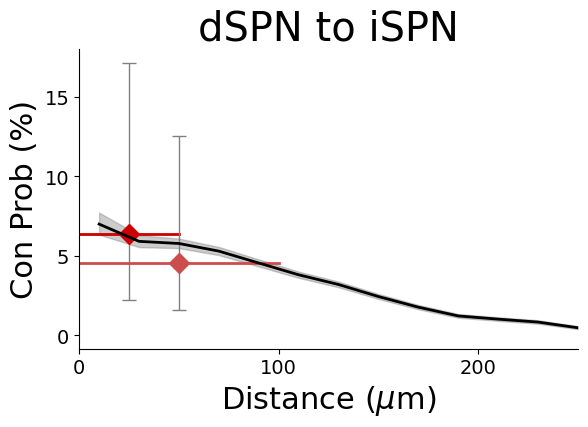

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf


In [9]:
sa.plot_connection_probability("dSPN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[3 / 47.0, 3 / 66.0],
                               exp_data_detailed=[(3, 47), (3, 66)],
                               y_max=y_max_H)

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [394390.]
Rejected (too large z-depth): 542634
P(d<5e-05) = 0.2866669711780021
P(d<0.0001) = 0.2211439996098893


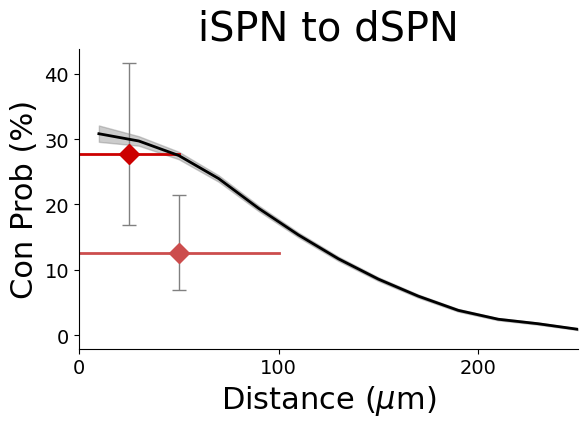

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf


In [10]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)

Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [393900.]
Rejected (too large z-depth): 542156
P(d<5e-05) = 0.3493066606046829
P(d<0.0001) = 0.29120264183270234


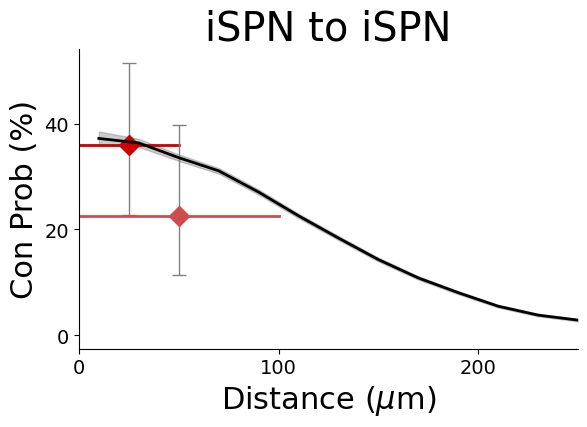

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf


In [11]:
sa.plot_connection_probability("iSPN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[14 / 39.0, 7 / 31.0],
                               exp_data_detailed=[(14, 39), (7, 31)],
                               y_max=y_max_H)

Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 27/27
Counting connections
Requested: 10000000.0 calculated [278.]
Rejected (too large z-depth): 424
P(d<0.00025) = 0.15163934426229508


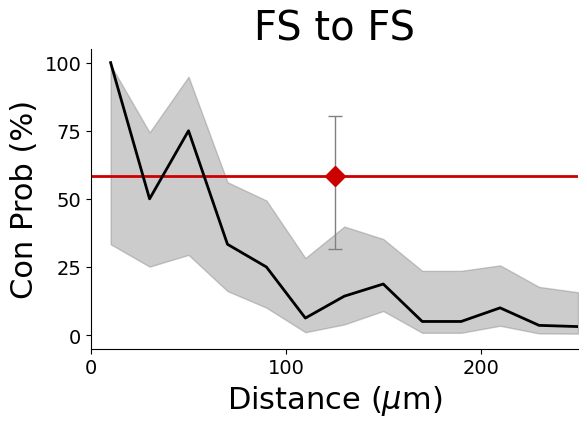

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-2D-dist.pdf


In [12]:
#  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
# FS->FS synapses weaker, 1.1 +/- 1.5nS
sa.plot_connection_probability("FS", "FS",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[7 / 12.0],
                               exp_data_detailed=[(7, 12)])

The next cell is FS-FS gap junction connectivity. This data is from young or juvenlie mice, and adult mice might have lower connectivity (8%?). I will update the tuning for adults soon.

Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 27/27
Counting connections
Requested: 10000000.0 calculated [278.]
Rejected (too large z-depth): 424
P(d<0.00025) = 0.0860655737704918
P(d<0.00025) = 0.0860655737704918


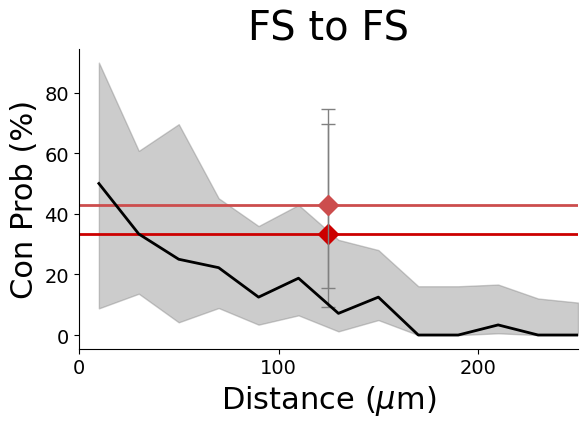

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-2D-dist.pdf


In [13]:
# Koos & Tepper 1999, 2/6
sa.plot_connection_probability("FS", "FS",
                               dist_3d=dist3D,
                               connection_type="gapjunctions",
                               exp_max_dist=[250e-6, 250e-6],
                               exp_data=[2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(2, 6), (3, 7)], )

Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [10659.]
Rejected (too large z-depth): 15477
P(d<0.0001) = 0.6539235412474849
P(d<0.00015) = 0.5280045566736282
P(d<0.00025) = 0.322067387687188


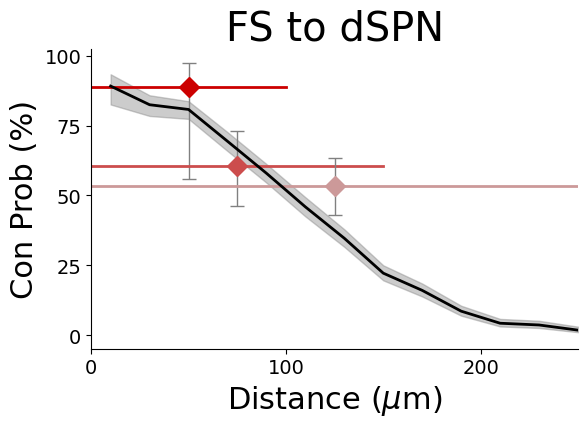

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-2D-dist.pdf


In [14]:
sa.plot_connection_probability("FS", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[100e-6, 150e-6, 250e-6],
                               exp_data=[8 / 9.0, 29 / 48.0, 48 / 90.0],
                               exp_data_detailed=[(8, 9), (29, 48), (48, 90)],
                               y_max=None)

Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [10662.]
Rejected (too large z-depth): 15474
P(d<0.0001) = 0.49610838858460654
P(d<0.00015) = 0.38946573532188034
P(d<0.00025) = 0.2365011918333506


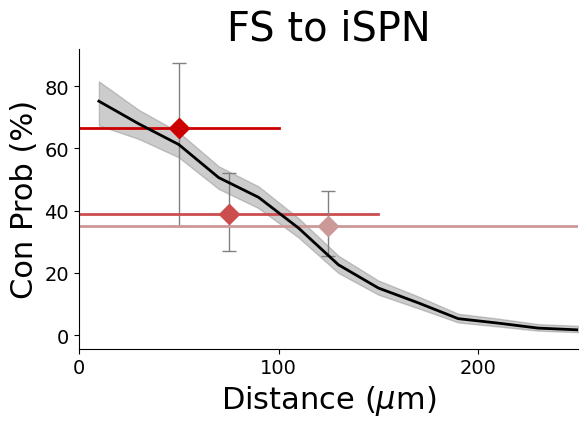

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-2D-dist.pdf


In [15]:
sa.plot_connection_probability("FS", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[100e-6, 150e-6, 250e-6],
                               exp_data=[6 / 9.0, 21 / 54.0, 27 / 77.0],
                               exp_data_detailed=[(6, 9), (21, 54), (27, 77)],
                               y_max=None)

Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [5402.]
Rejected (too large z-depth): 8150
P(d<0.00025) = 0.030235389610389612


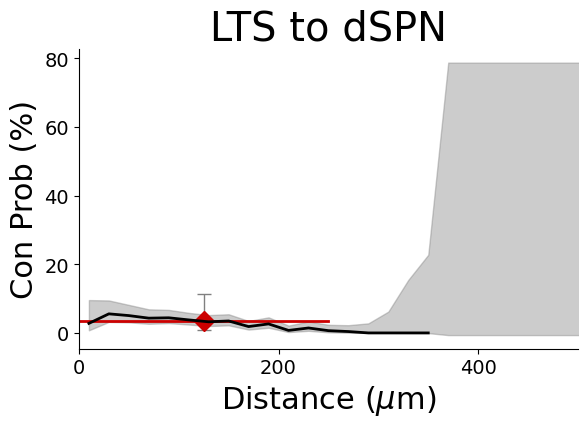

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf


In [16]:
# 3/21 LTS->MS, Basal Ganglia book --- distance??
# Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
# but 2/60 when patching blind
sa.plot_connection_probability("LTS", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2 / 60.0],
                               exp_data_detailed=[(2, 60)],
                               x_max=500)

Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [5480.]
Rejected (too large z-depth): 8072
P(d<0.00025) = 0.018636003172085646


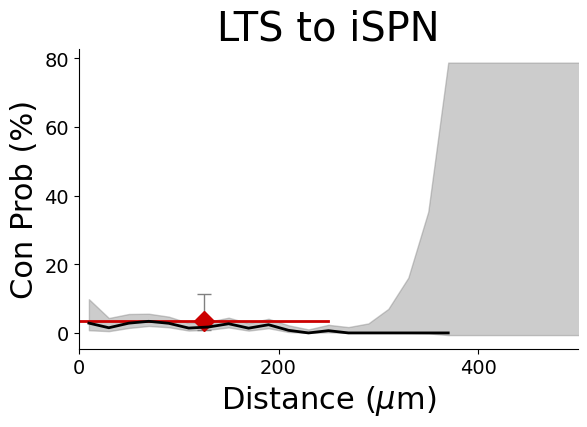

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf


In [17]:
sa.plot_connection_probability("LTS", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2 / 60.0],
                               exp_data_detailed=[(2, 60)],
                               x_max=500)

Plotting connection probability FS to LTS (synapses)
Centering in None : Keeping 14/14
Counting connections
Requested: 10000000.0 calculated [143.]
Rejected (too large z-depth): 235
P(d<0.00025) = 0.04


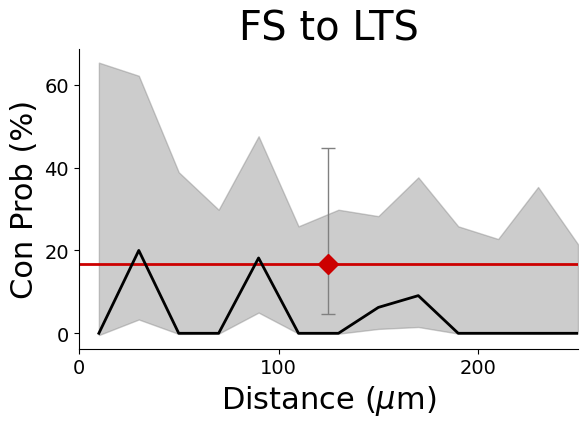

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-LTS-synapses-2D-dist.pdf


In [18]:
# Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
sa.plot_connection_probability("FS", "LTS",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2.0 / 12],
                               exp_data_detailed=[(2, 12)])

The Chin to dSPN/iSPN should be run with larger networks.

Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [8800.]
Rejected (too large z-depth): 12496
P(d<0.00025) = 0.0


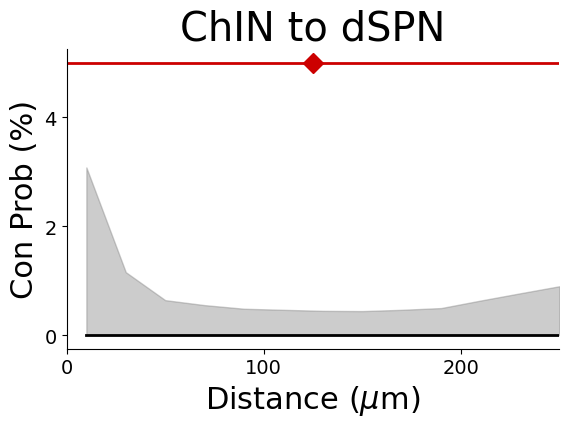

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf


In [19]:
# Janicova 2015?? --- distance?
sa.plot_connection_probability("ChIN", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[0.05])

Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [8886.]
Rejected (too large z-depth): 12410
P(d<0.00025) = 0.0


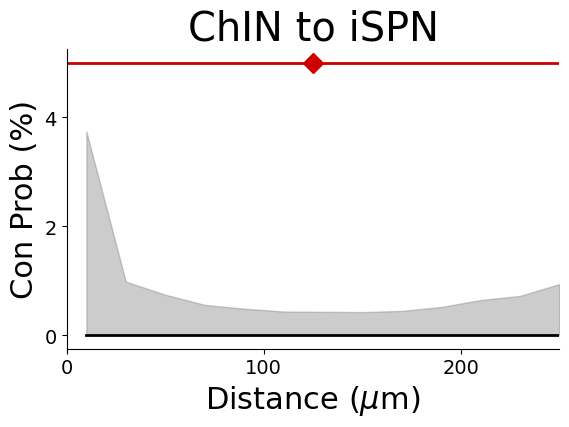

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf


In [20]:
sa.plot_connection_probability("ChIN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[0.05])